In [1]:
from fastai.vision import *

In [2]:
path = Path('data')

In [3]:
path.ls()

[WindowsPath('data/models'),
 WindowsPath('data/non_smoker'),
 WindowsPath('data/non_smoker.csv'),
 WindowsPath('data/smoker'),
 WindowsPath('data/smoker.csv')]

In [4]:
for file, folder in [('smoker.csv', 'smoker'), ('non_smoker.csv', 'non_smoker')]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=400)

In [15]:
#View data
np.random.seed(124)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [16]:
data.classes

['non_smoker', 'smoker']

In [17]:
doc(data.show_batch)

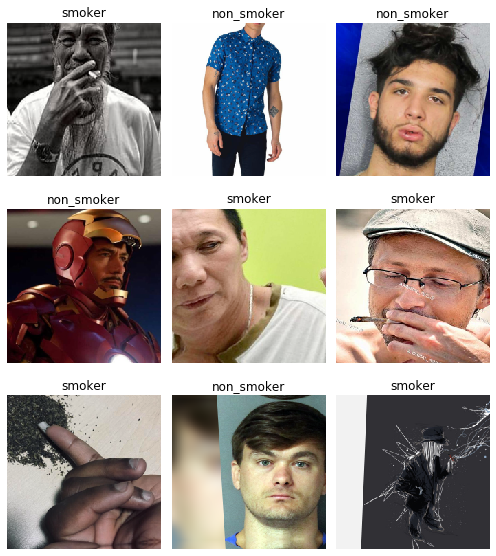

In [18]:
data.show_batch(rows=3, figsize=(7, 8))

In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['non_smoker', 'smoker'], 2, 563, 140)

In [23]:
from fastai.metrics import error_rate # 1 - accuracy
#learn = create_cnn(data, models.resnet34, metrics=error_rate)
#learn = create_cnn(data, models.vgg16_bn, metrics=error_rate)
learn = create_cnn(data, models.alexnet, metrics=error_rate)

C:\Users\Amine\.conda\envs\fastai_v1\lib\site-packages\fastai\vision\learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [24]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (563 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
non_smoker,non_smoker,non_smoker,non_smoker,non_smoker
Path: data;

Valid: LabelList (140 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
non_smoker,non_smoker,smoker,smoker,non_smoker
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [13]:
doc(learn.fit_one_cycle)

In [25]:
defaults.device = torch.device('cpu') # makes sure the gpu is used
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.822443,0.384720,0.121429,02:34
1,0.642407,0.273886,0.100000,02:40
2,0.541688,0.279758,0.135714,02:47
3,0.489352,0.246597,0.128571,02:40
4,0.434864,0.240528,0.114286,02:37


In [26]:
learn.unfreeze()

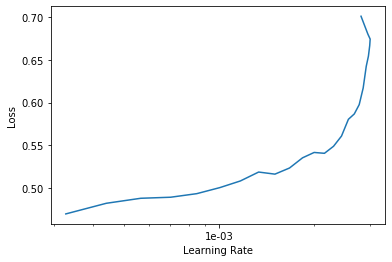

In [27]:
learn.recorder.plot()

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

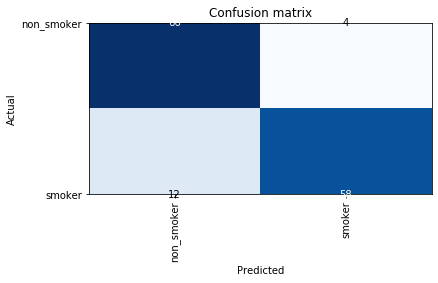

In [29]:
interp.plot_confusion_matrix()

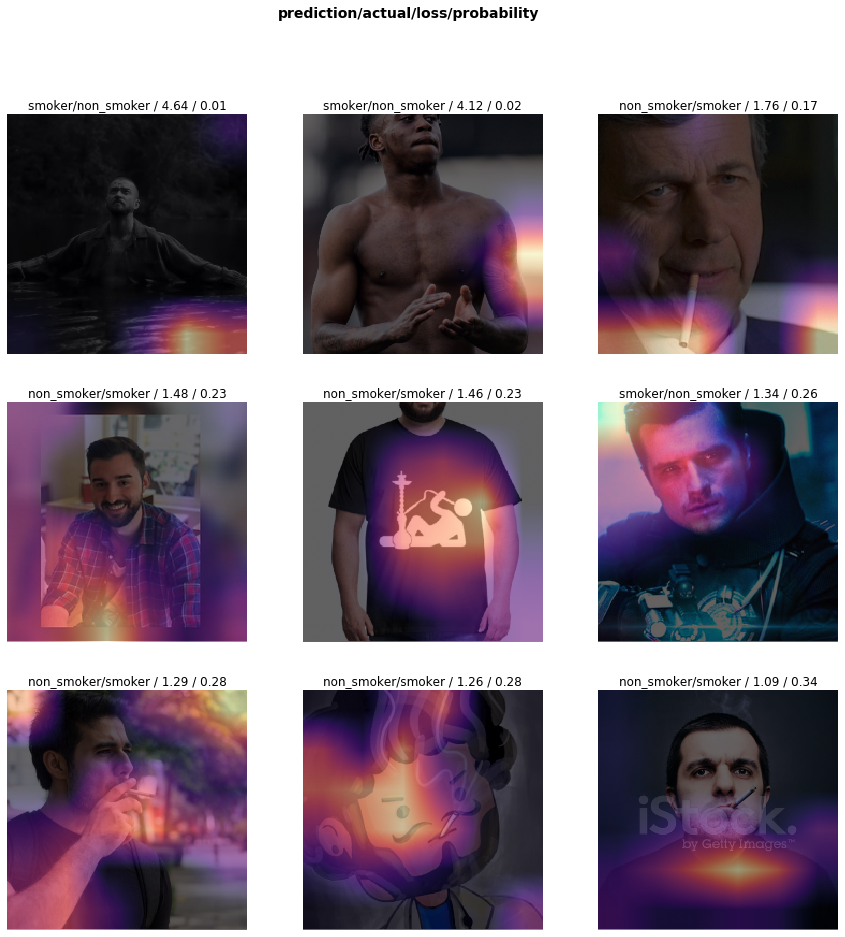

In [30]:
interp.plot_top_losses(9, figsize=(15,15))

In [31]:
learn.save("alexnet")

In [4]:
learn.load('alexnet')

NameError: name 'learn' is not defined

In [19]:
img = open_image('data/smoker/00000005.jpg')

In [21]:
img.type()

AttributeError: 'Image' object has no attribute 'type'

In [5]:
classes = ['non_smoker', 'smoker']
data2 = ImageDataBunch.single_from_classes(path, classes,ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.alexnet)
learn.load('alexnet')

#data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

C:\Users\Amine\.conda\envs\fastai_v1\lib\site-packages\fastai\vision\learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation

In [6]:
pred_class,pred_idx,outputs = learn.predict(img)

In [7]:
learn.predict(img)

(Category smoker, tensor(1), tensor([0.1855, 0.8145]))

In [18]:
from PIL import Image
import urllib2 as urllib
import io

fd = urllib.urlopen('https://upload.wikimedia.org/wikipedia/en/3/34/The_Smoking_Man_%28X-Files%29.jpg')
image_file = io.BytesIO(fd.read())
img2 = Image.open(image_file)

ModuleNotFoundError: No module named 'urllib2'

In [16]:
pred_class,pred_idx,outputs = learn.predict(img2)

AttributeError: 'JpegImageFile' object has no attribute 'apply_tfms'

In [17]:
learn.predict(img2)

AttributeError: 'JpegImageFile' object has no attribute 'apply_tfms'